In [4]:
import pandas as pd

# Specify the input file
input_file = '../data/data_clustered.csv'

# Load the clustered data
df = pd.read_csv(input_file)

# Print the first 5 rows
df.head()


categories update_date  \
0           hep-ph  2008-11-26   
1    math.CO cs.CG  2008-12-13   
2   physics.gen-ph  2008-01-13   
3          math.CO  2007-05-23   
4  math.CA math.FA  2013-10-15   

                                                text  cluster  
0  calculation prompt diphoton production cross s...        9  
1  sparsity certifying graph decomposition descri...       14  
2  evolution earth moon system dark matter field ...        3  
3  determinant stirling cycle number count unlabe...        0  
4  dyadic lambda alpha lambda alpha compute lambd...        7

cluster
0     429959
1     175053
2      75523
3      69047
4     384412
5     107508
6      37156
7     343103
8     123478
9     144508
10     73925
11     22969
12     97379
13     52452
14     45427
15    106243
Name: count, dtype: int64


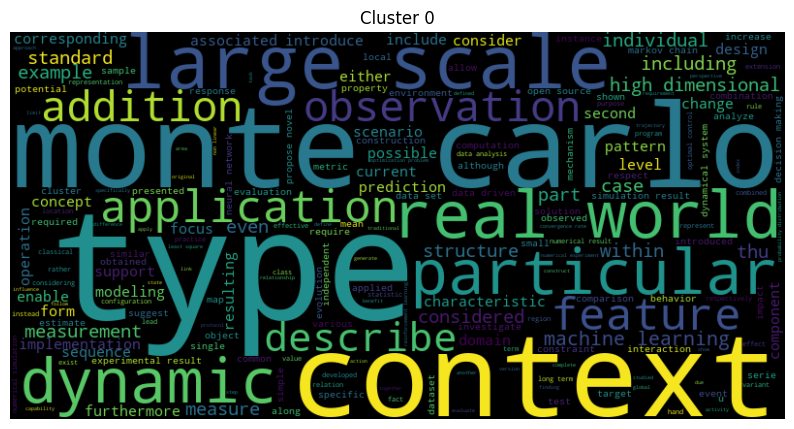

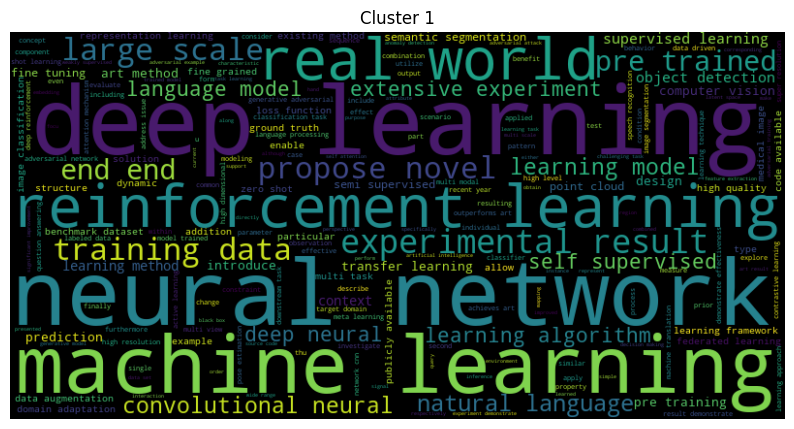

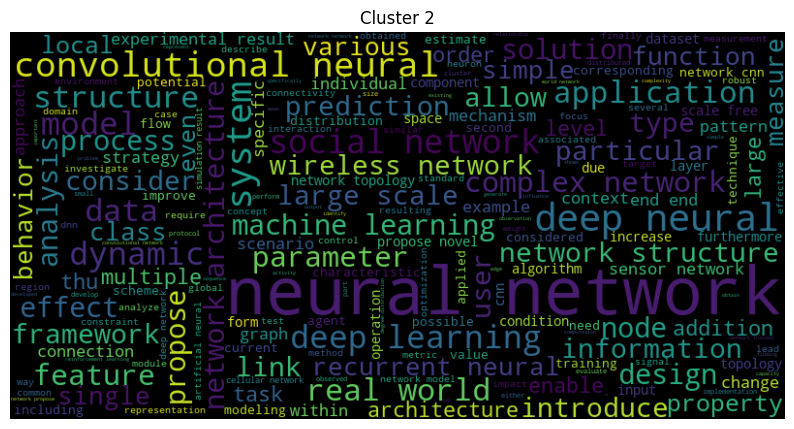

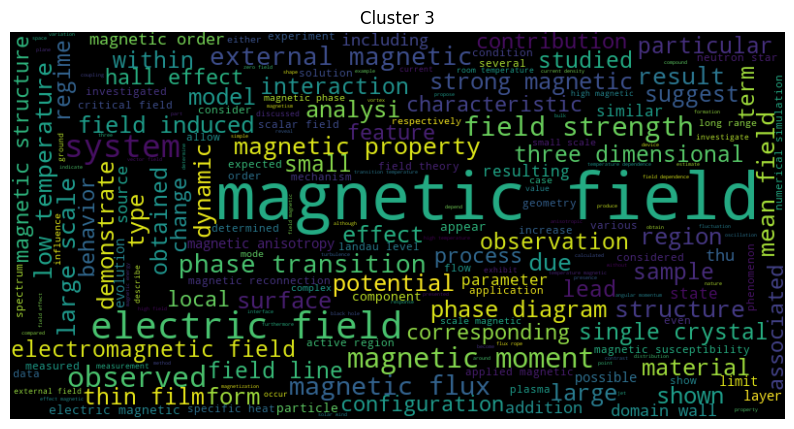

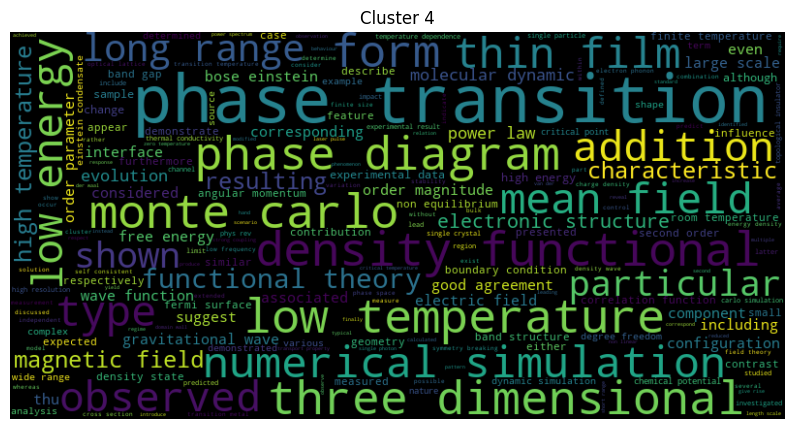

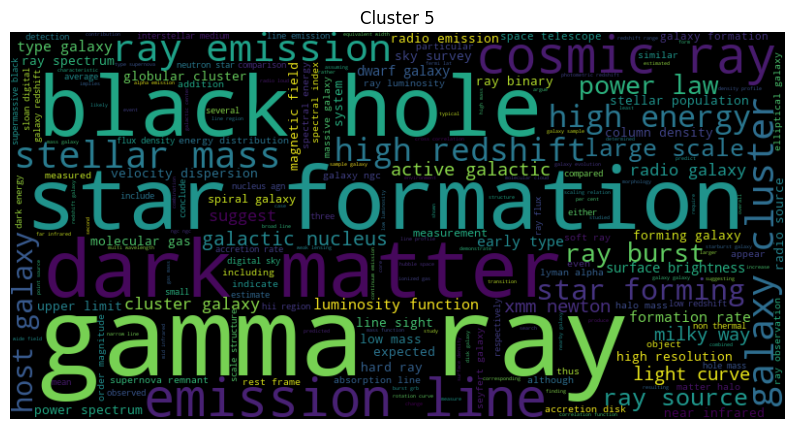

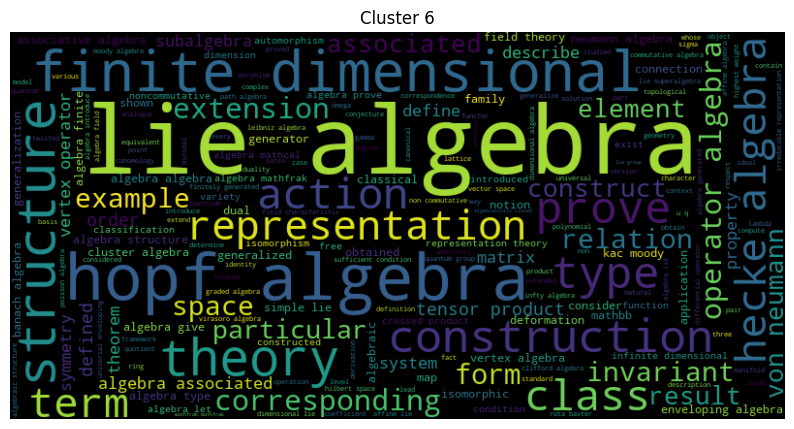

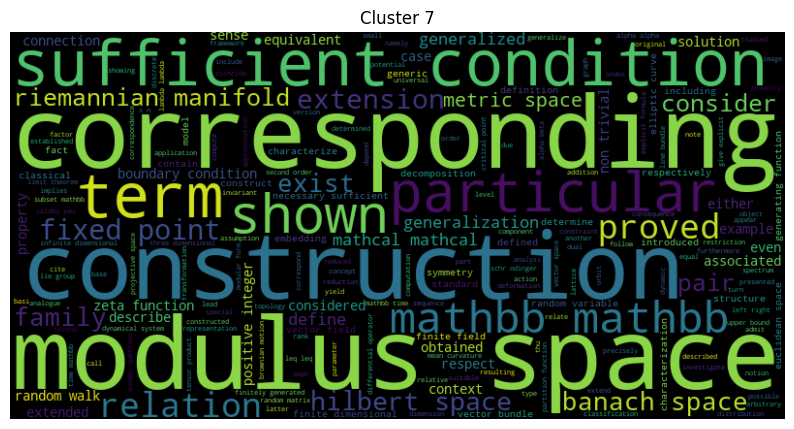

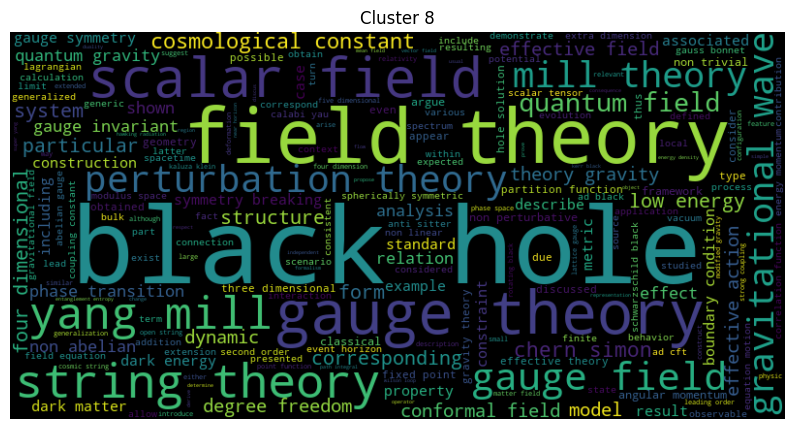

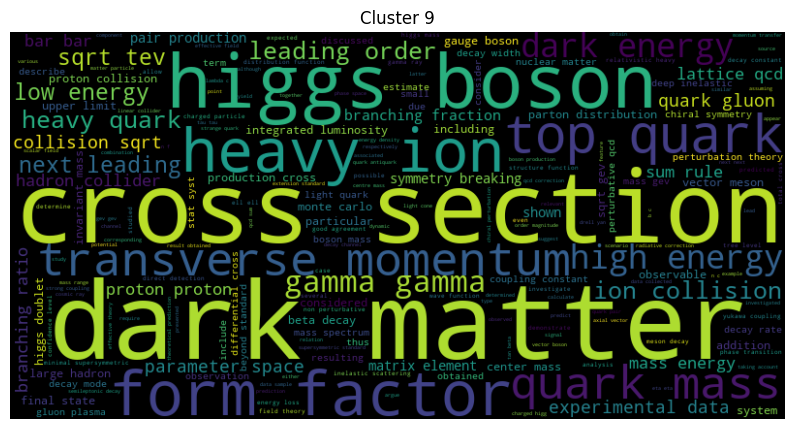

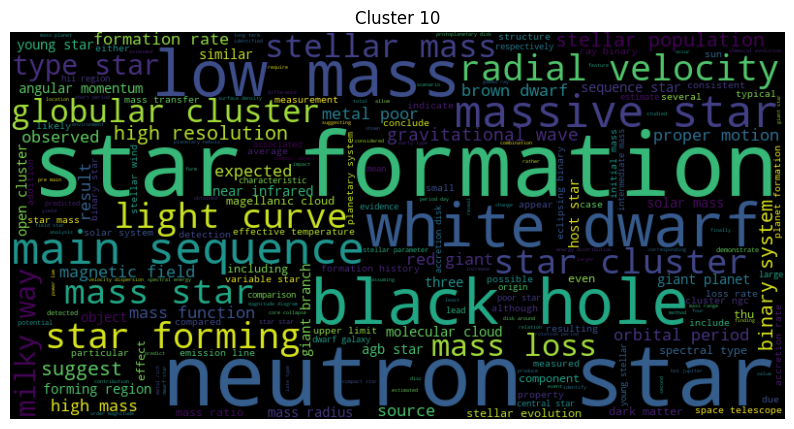

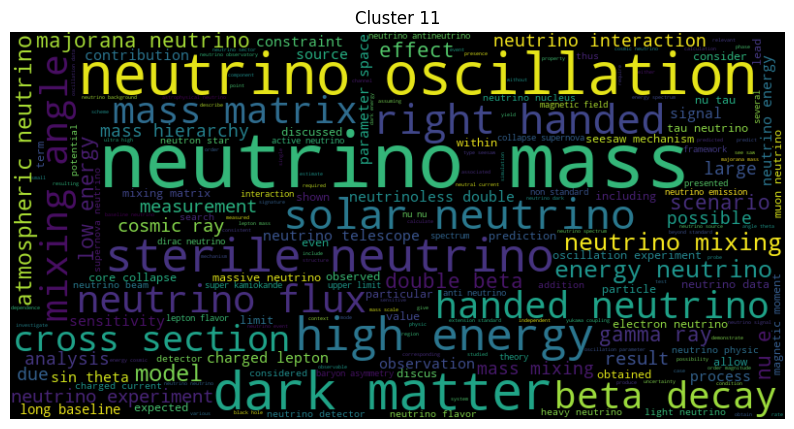

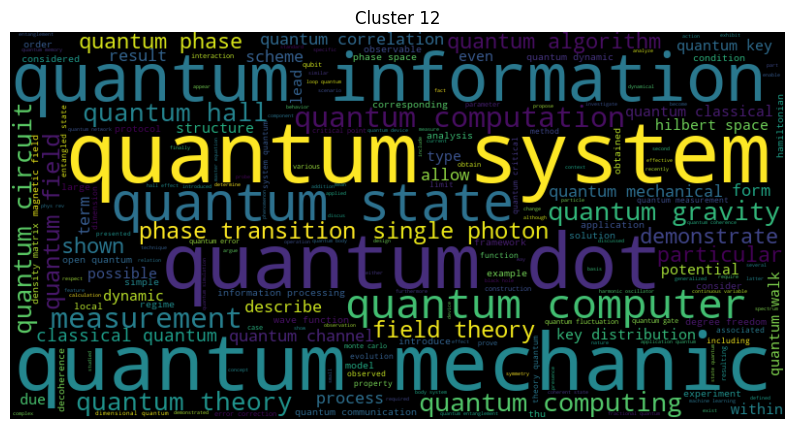

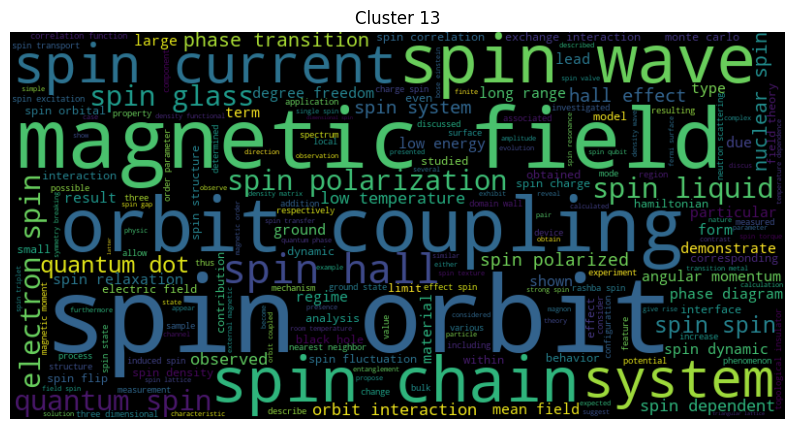

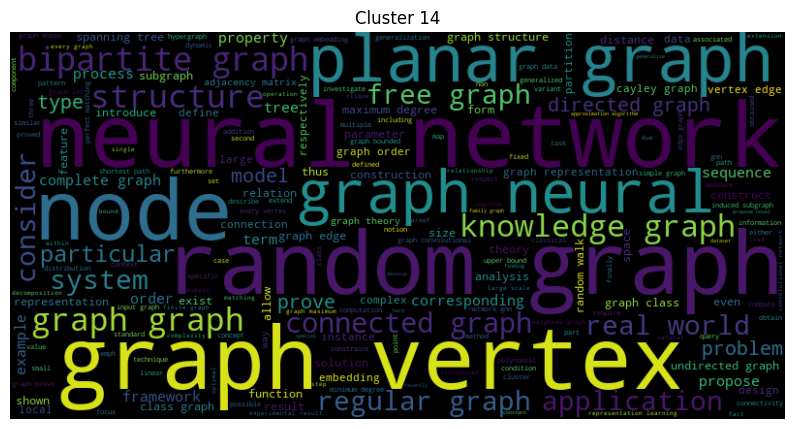

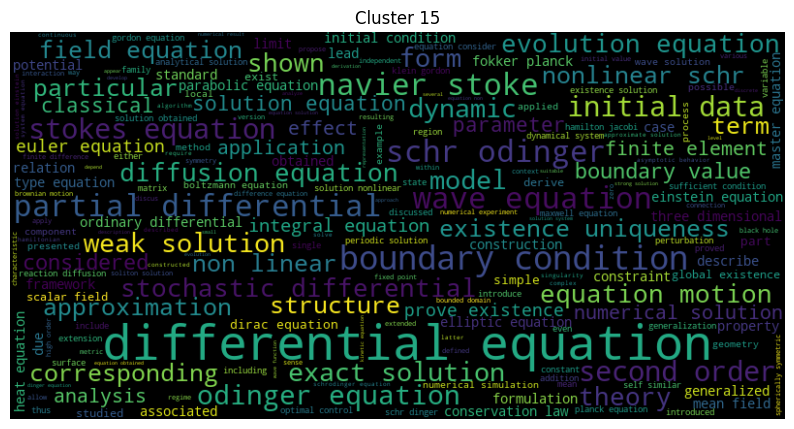

Cluster 0: [('system', 336046), ('data', 313502), ('algorithm', 266167), ('result', 163732), ('analysis', 144086)]
Cluster 1: [('learning', 296027), ('image', 218474), ('data', 193029), ('task', 153624), ('model', 145012)]
Cluster 2: [('network', 349019), ('neural', 78697), ('data', 44974), ('system', 40387), ('node', 36926)]
Cluster 3: [('field', 225717), ('magnetic', 210024), ('effect', 36304), ('temperature', 35829), ('phase', 30270)]
Cluster 4: [('phase', 224465), ('energy', 214690), ('system', 186098), ('temperature', 172183), ('effect', 152321)]
Cluster 5: [('galaxy', 285088), ('ray', 169317), ('emission', 108614), ('mass', 96691), ('source', 91391)]
Cluster 6: [('algebra', 143507), ('lie', 26774), ('module', 15908), ('theory', 15274), ('representation', 14759)]
Cluster 7: [('space', 215323), ('function', 188319), ('mathbb', 118933), ('prove', 105516), ('operator', 99608)]
Cluster 8: [('theory', 250645), ('field', 131544), ('black', 100979), ('hole', 100881), ('gauge', 80171)]
Cl

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Analyze the distribution of clusters
cluster_counts = df['cluster'].value_counts().sort_index()
print(cluster_counts)

# Generate word clouds for each cluster
for cluster in cluster_counts.index:
    text = ' '.join(df[df['cluster'] == cluster]['text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')
    plt.show()

# print five frequent words in each cluster in a table where each row is a cluster and each column is a word
for cluster in cluster_counts.index:
    text = ' '.join(df[df['cluster'] == cluster]['text'])
    word_counts = Counter(text.split()).most_common(5)
    print(f'Cluster {cluster}: {word_counts}')
    


       count
year        
2007  145892
2008   69343
2009  229063
2010   56214
2011   61844
2012   57301
2013   72027
2014   88119
2015  215104
2016  133625
2017  122520
2018  136216
2019  155680
2020  177519
2021  193583
2022  215220
2023  158885


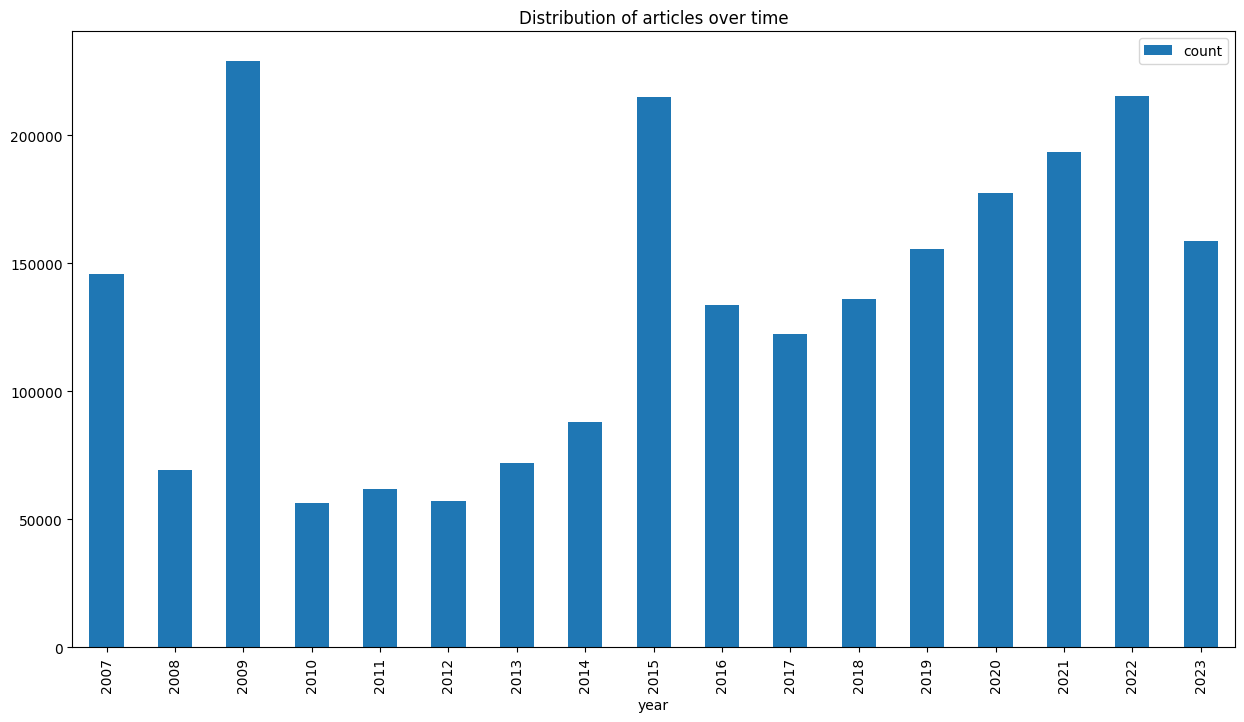

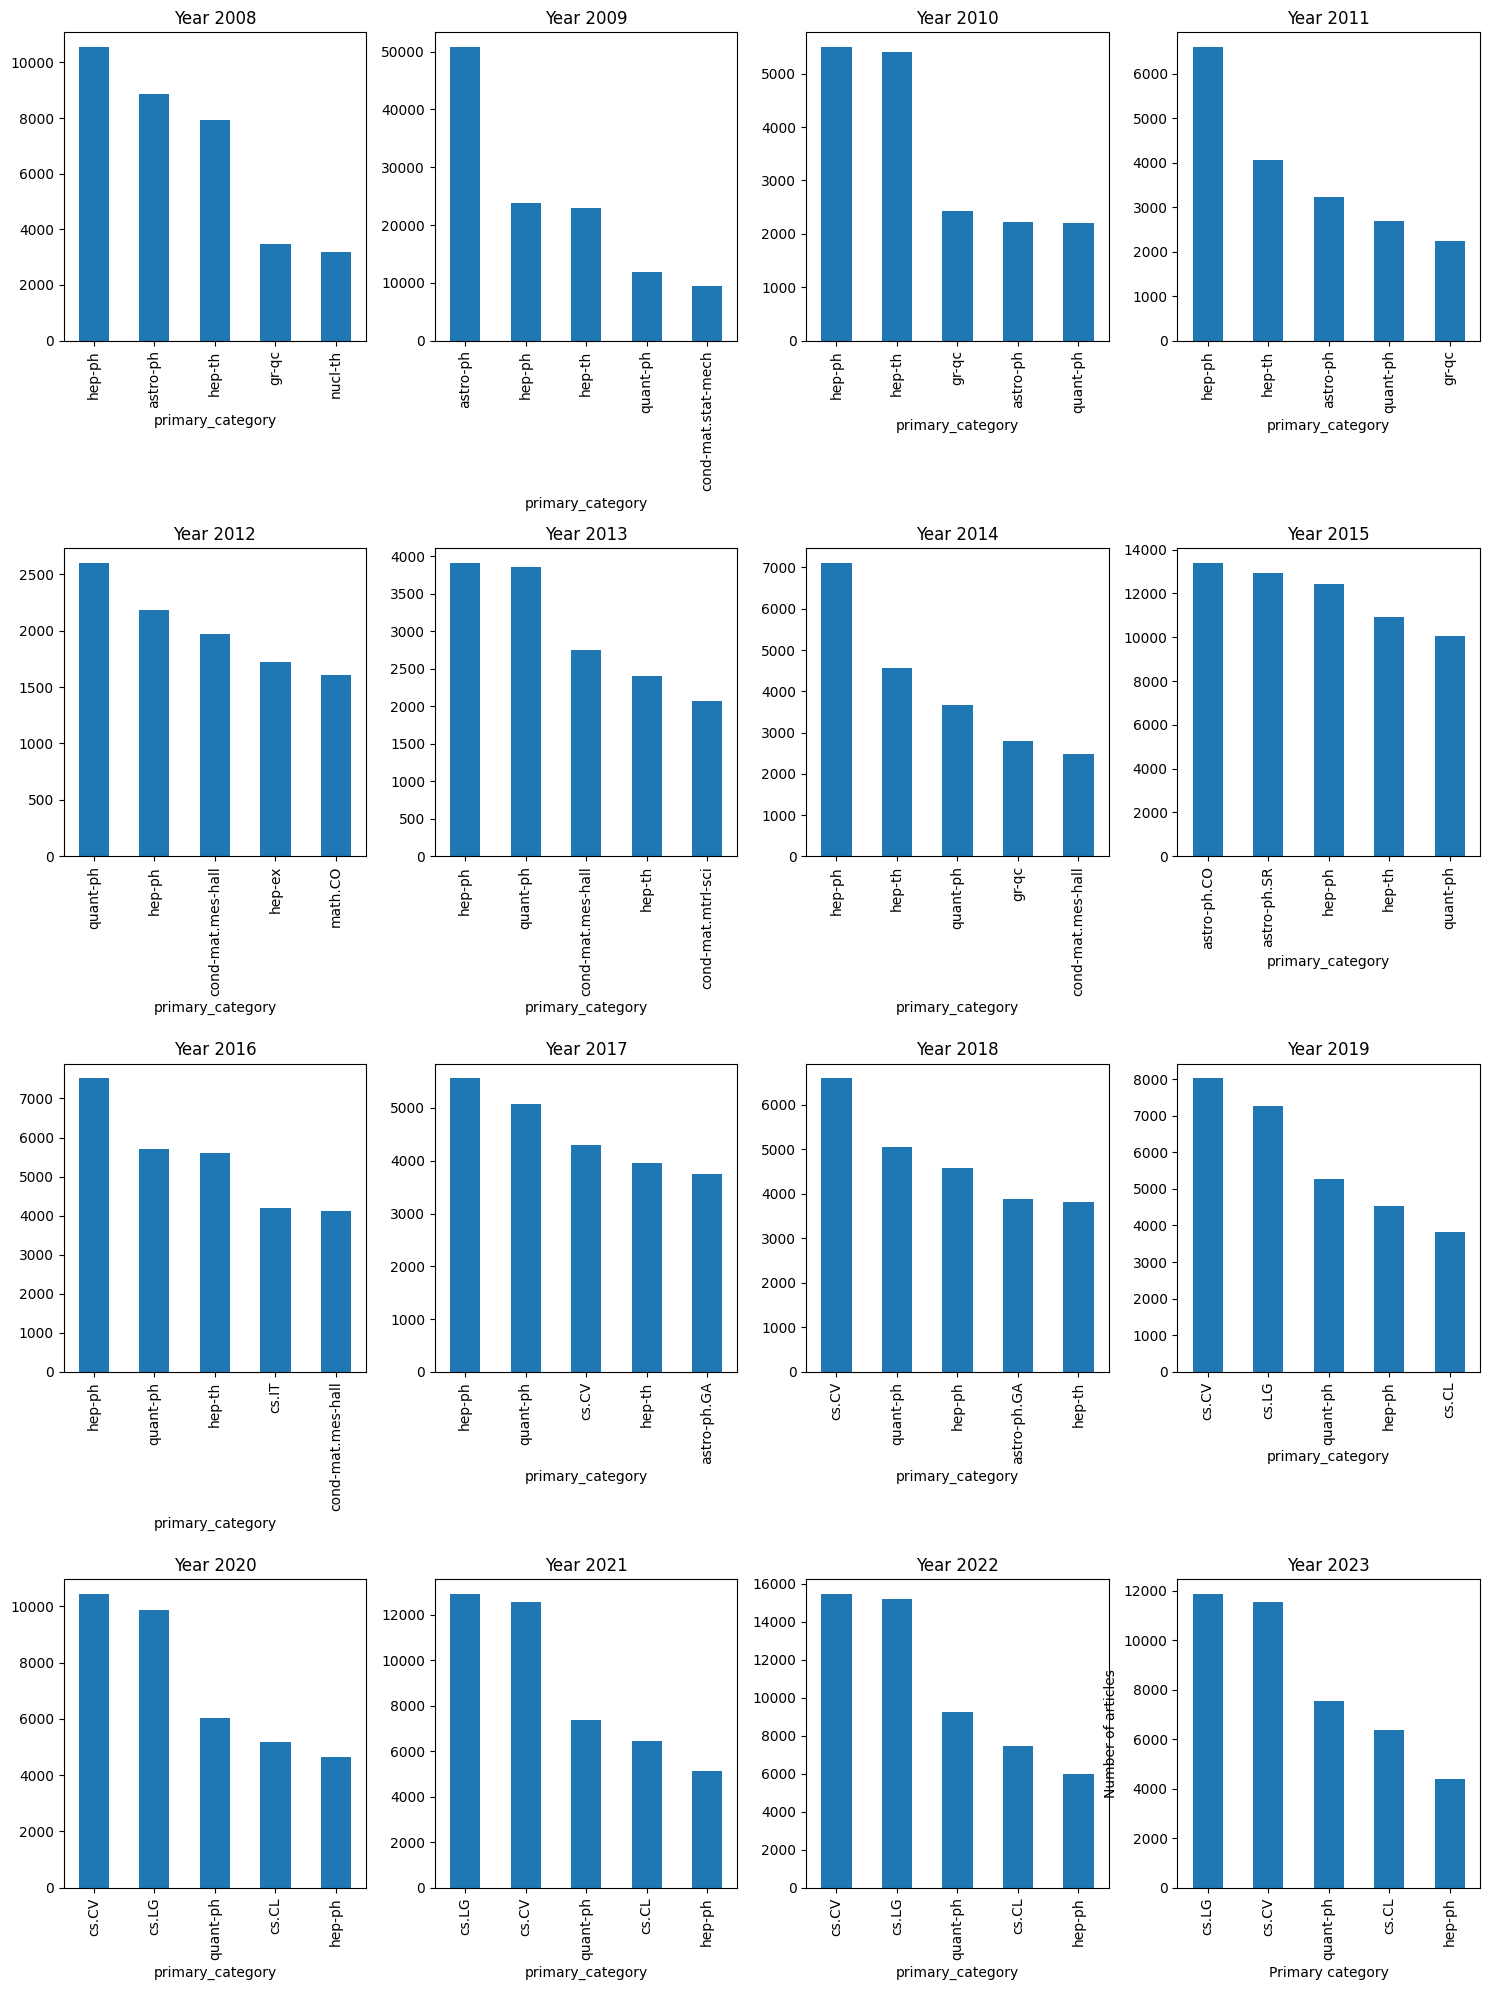

In [57]:
# Extract the year from the 'update_date' column
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Analyze the distribution of articles over time
year_counts = df['year'].value_counts().sort_index()
# Convert the series to a dataframe
year_counts = year_counts.to_frame()
year_counts.columns = ['count']
print(year_counts)

# Plot the distribution of articles over time
year_counts.plot(kind='bar', figsize=(15, 8), title='Distribution of articles over time')
plt.show()


# show the distribution of primary categories of each year using bar charts 
fig, axes = plt.subplots(4, 4, figsize=(15, 20))
for i, ax in enumerate(axes.flatten()):
    df[df['year'] == 2008 + i]['primary_category'].value_counts().head(5).plot(kind='bar', ax=ax, title=f'Year {2008 + i}')
plt.tight_layout()
plt.ylabel('Number of articles')
plt.xlabel('Primary category')
plt.show()



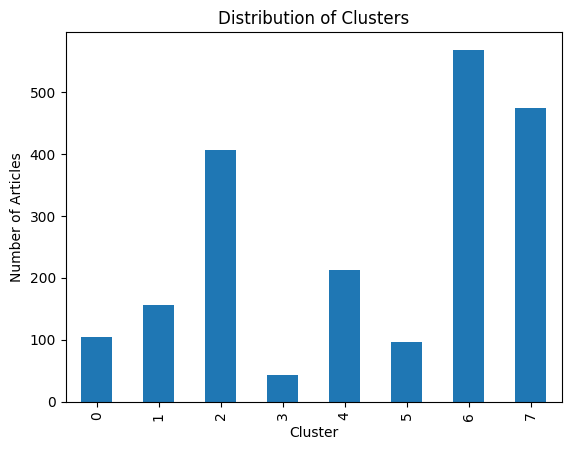

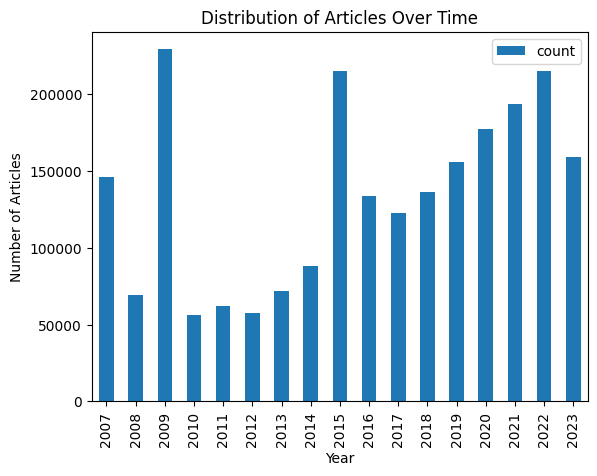

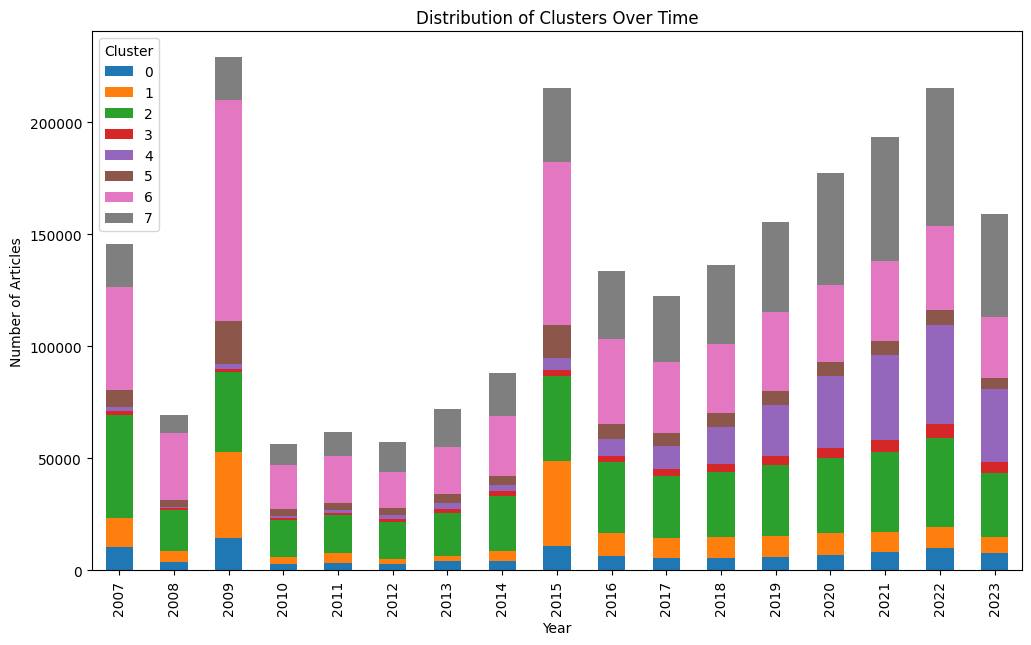

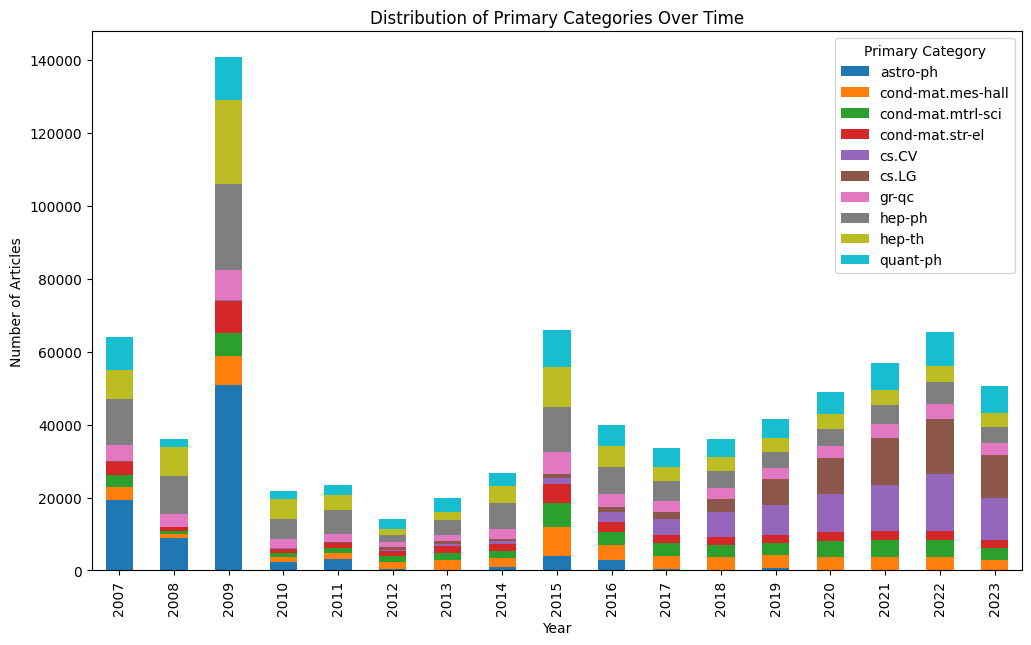

In [61]:
# Visualize the distribution of clusters
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Articles')
plt.title('Distribution of Clusters')
plt.show()

# Visualize the distribution of articles over time
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles Over Time')
plt.show()

# Visualize the distribution of clusters over time
cluster_year_counts.unstack().plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Clusters Over Time')
plt.legend(title='Cluster')
plt.show()

# Visualize the distribution of primary categories over time
top_categories = df['primary_category'].value_counts().index[:10]
category_year_counts = df[df['primary_category'].isin(top_categories)].groupby(['year', 'primary_category'])['primary_category'].count().to_frame()
category_year_counts.columns = ['count']
category_year_counts = category_year_counts.reset_index()
category_year_counts = category_year_counts.pivot(index='year', columns='primary_category', values='count')
category_year_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Primary Categories Over Time')
plt.legend(title='Primary Category')
plt.show()
